# Засоби підготовки та налізу даних
## Лабораторна робота №2
### ФБ-22 Лаптєв Денис
#### Підготовка середовища

In [2]:
from os import listdir
from datetime import datetime
import urllib.request
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print ('setup complete')

setup complete


#### Завантаження датасетів

In [5]:
def dwn (i, y1, y2):
    url='https://www.star.nesdis.noaa.gov/smcd/emb/vci/VH/get_TS_admin.php?country=UKR&provinceID='+str(i)+'&year1='+str(y1)+'&year2='+str(y2)+'&type=Mean'

    wp = urllib.request.urlopen(url)
    text = wp.read()

    now = datetime.now()
    date_and_time_time = now.strftime('%d-%m-%Y_%H-%M-%S')
    out = open('data/NOAA_ID'+str(i)+'_'+date_and_time_time+'.csv','wb') #'data/' — dir name
    out.write(text)
    out.close()




for i in range(1,28): # y 29
    dwn(i, 2000, 2020)

#### Зчитування фалуів та об'єднання в один датафрейм

Тут я не дуже зрозумів навіщо змінювати ідентифікатори адміністративних центрів\областей. Та й тим більше, що їх кількість різна.

In [7]:
def csvs_to_frame(dir):
    file_names = listdir(dir)

    headers = ['Year', 'Week', 'SMN', 'SMT', 'VCI', 'TCI', 'VHI', 'AreaID']
    dfs = []

    for name in file_names:
        df = pd.read_csv(dir+name, header = 1, names = headers)
        df['AreaID'] = int(name[7:-24])

        #data_cleaning
        df = df.drop(df.loc[df['VHI'] == -1].index)
        df = df.drop(df.index[-1])
        df.at[0, 'Year'] =  df.at[0, 'Year'][9:]
        df['Year'] = df['Year'].astype(int)

        dfs.append(df)

    frame = pd.concat(dfs).drop_duplicates().reset_index(drop=True)
    return frame

#no sort

df = csvs_to_frame('data/')

In [8]:
#df[(df['Year']=='<tt><pre>2000') & (df['Week']==1)]
#df[(df['Year']== '</pre></tt>')]
#df[(df['VHI']== -1)]
df

,Year,Week,SMN,SMT,VCI,TCI,VHI,AreaID
0,2000,1.0,0.033,260.29,21.28,40.64,30.96,10
1,2000,2.0,0.033,260.40,22.74,42.06,32.40,10
2,2000,3.0,0.036,261.40,28.74,39.77,34.26,10
3,2000,4.0,0.043,262.45,36.16,37.55,36.86,10
4,2000,5.0,0.049,264.25,39.26,35.74,37.50,10
...,...,...,...,...,...,...,...,...
28939,2020,48.0,0.159,277.21,66.52,16.25,41.37,9
28940,2020,49.0,0.150,275.06,65.68,19.44,42.55,9
28941,2020,50.0,0.144,274.00,66.17,18.69,42.43,9
28942,2020,51.0,0.138,272.73,66.79,19.59,43.19,9


#### Виведення

##### 1
Ряд VHI для області за вказаний рік, пошук екстремумів (min та max);

max: 11.25 
min: 63.27


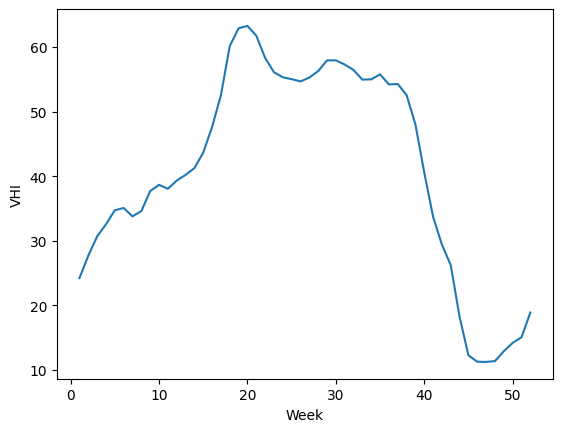

In [20]:

def fun_1 (AreaID, year):
    temp_df = df[(df['Year'] == year) & (df['AreaID'] == AreaID)]
    print ('max:', temp_df['VHI'].min(), '\nmin:', temp_df['VHI'].max())
    sns.lineplot(x=temp_df['Week'], y=temp_df['VHI'])


fun_1(24, 2000)

##### 2
Ряд VHI за вказаний діапазон років для вказаних областей; виявити роки, протягом яких екстремальні посухи торкнулися більше вказаного відсотка областей по Україні (20% областей - 5 областей з 25);

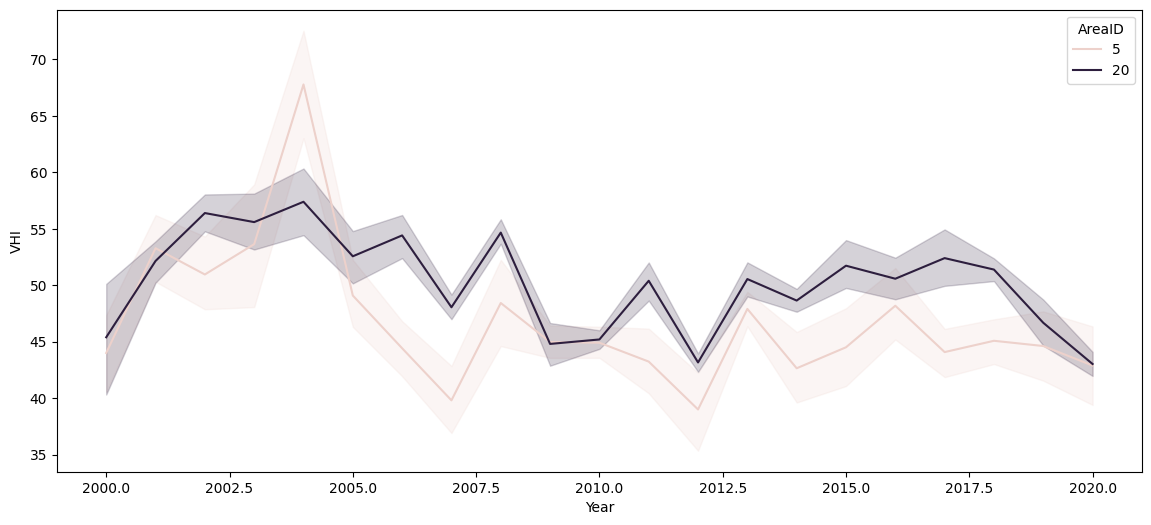

In [31]:
def fun_21(y1, y2, areas):
    temp_df = df[(df['Year'] >= y1) & (df['Year'] <= y2) & (df['AreaID'].isin(areas))]
    plt.figure(figsize=(14,6))
    sns.lineplot(x=temp_df['Year'], y=temp_df['VHI'], hue=temp_df['AreaID'])

def fun_22():
    df_drought = df[df['VHI'] <= 15]


fun_21(2000, 2020, [5, 20])


##### 3
Аналогічно для помірних посух